In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


# Machine Learning Models for Early Detection of Fetal Distress

**Abstract**

According to the World Health Organization, there are nearly 2 million stillbirths1 every year.
Over 40% of all stillbirths occur during labour, a loss that could be avoided with improved quality
and respectful care during childbirth including routine monitoring and timely access to emergency
obstetric care when required. The most common methods of diagnosing perinatal death and
taking early precaution for maternal and fetal health is NST (nonstress test) which is a pregnancy
screening that measures fetal heart rate and reaction to movement. This project focuses on
implementing predictive models for the early detection of fetal distress and aims to classify fetal
health categories.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Splitting the data
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# For checking Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action="ignore")

# Load Data

In [3]:
#LOADING DATA SET
fetal_data=pd.read_csv('../input/fetal-health-classification/fetal_health.csv')
fetal_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# EXPLORATORY DATA ANALYSIS
**The analysis consist of:**
* Check for missing values
* Shape of dataset
* Type of values
* Describe the dataset
* Finding Uniqe Values
* Data visualizations

In [4]:
#Check for missing values
null=fetal_data.isnull().sum()
null

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

based on output, there are no null values hence the data is clean.

In [5]:
#Shape of dataset
fetal_data.shape

(2126, 22)

In [6]:
#Type of values
fetal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Based on output, all the values in the dataset are float. There are no string values in the dataset.

In [7]:
#Describe the dataset
fetal_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [8]:
#finding the uniqe values.
fetal_data['fetal_health'].unique()

array([2., 1., 3.])

The fetal health column as our target value, represented by 1, 2, 3 where, 1: normal, 2: suspect. 3: high risk

**Data visualizations of Target Value ”fetal health”**

<Axes: xlabel='fetal_health', ylabel='count'>

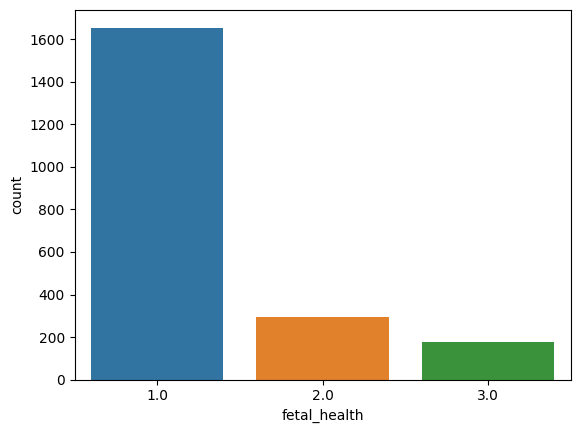

In [9]:
sns.countplot(data= fetal_data, x="fetal_health")

The figures shows that the number of ‘Normal’ cases is more followed by ‘Suspect’ cases followed by ‘Pathological’
cases.

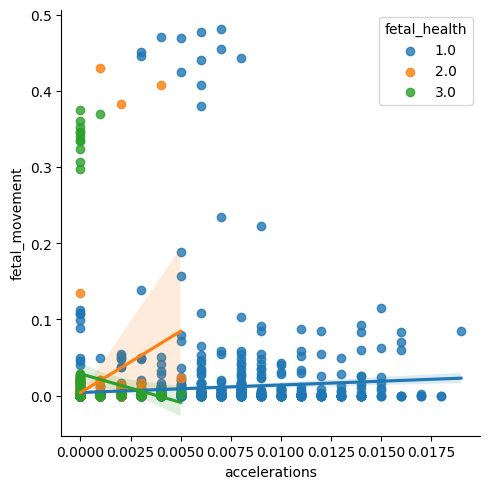

In [10]:
#Accelerations Vs Fetal Movement by Fetal Health
sns.lmplot(data =fetal_data,x="accelerations",y="fetal_movement",hue="fetal_health",legend_out=False)
plt.show()

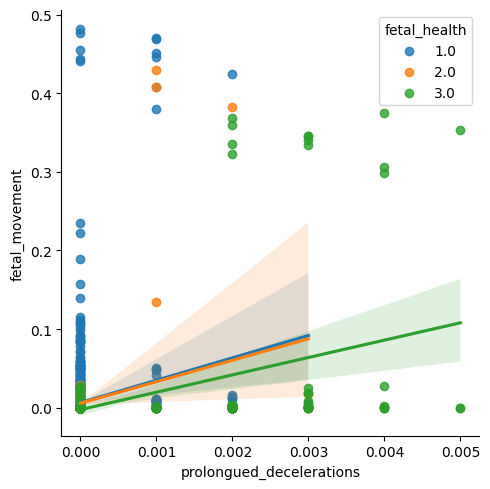

In [11]:
#Prolongued Decelerations Vs Fetal Movement by Fetal Health
sns.lmplot(data =fetal_data,x="prolongued_decelerations",y="fetal_movement",hue="fetal_health",legend_out=False)
plt.show()

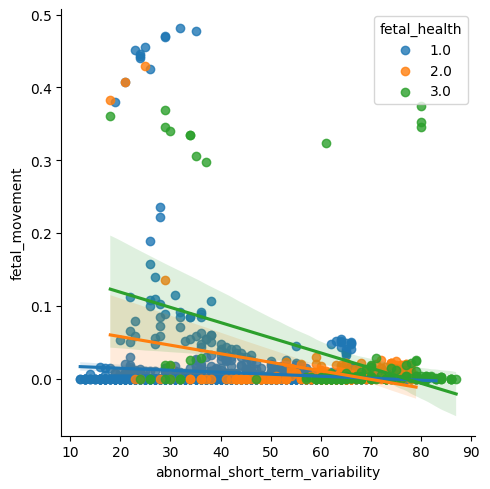

In [12]:
# Abnormal Short Term Variability Vs Fetal Movement by Fetal Health
sns.lmplot(data =fetal_data,x="abnormal_short_term_variability",y="fetal_movement",hue="fetal_health",legend_out=False)
plt.show()

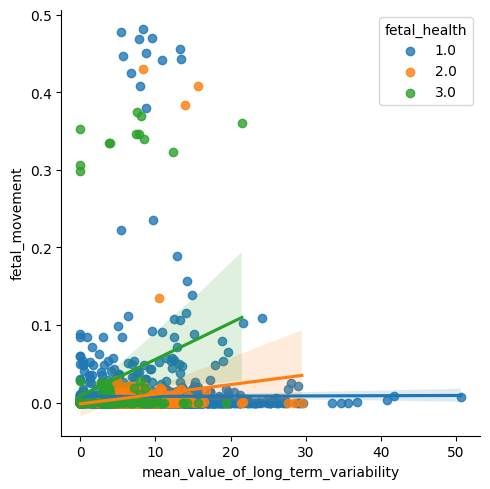

In [13]:
#Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health
sns.lmplot(data =fetal_data,x="mean_value_of_long_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

Noticeably, The rates of change of the above-mentioned values with each target show a specific trend. 

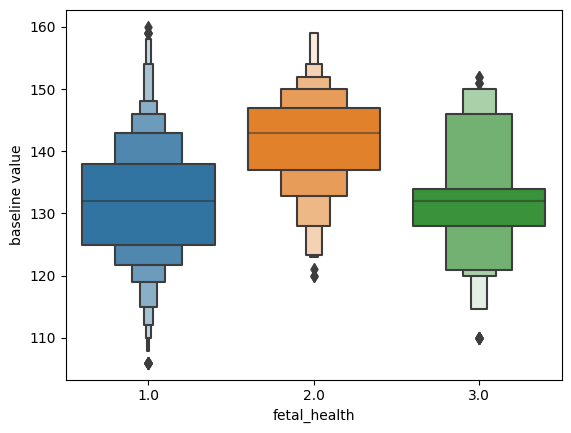

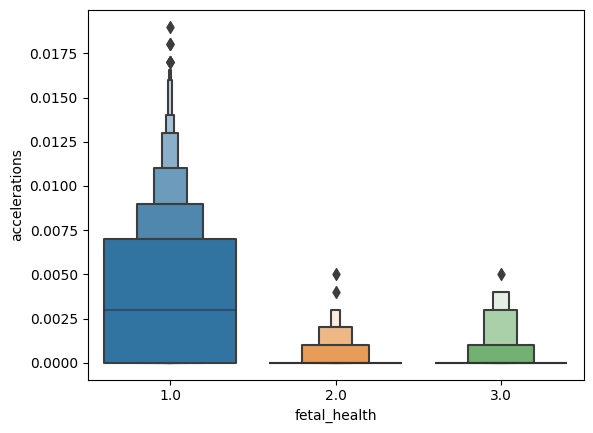

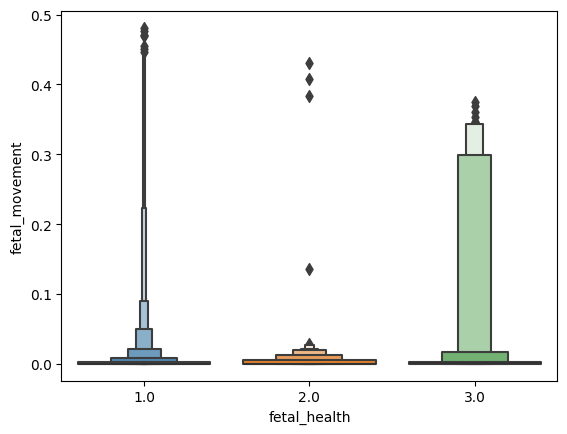

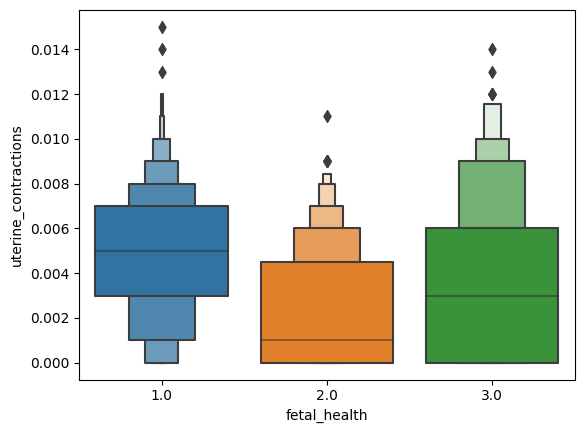

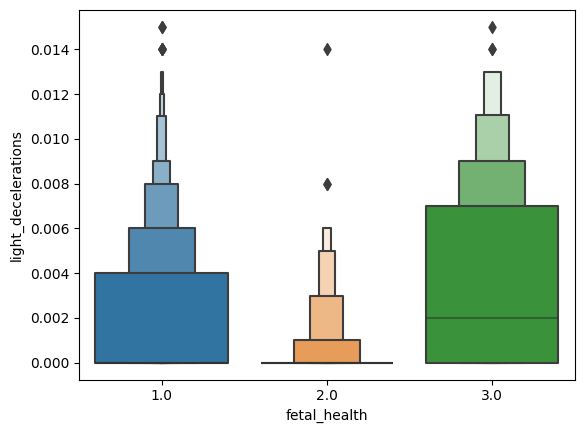

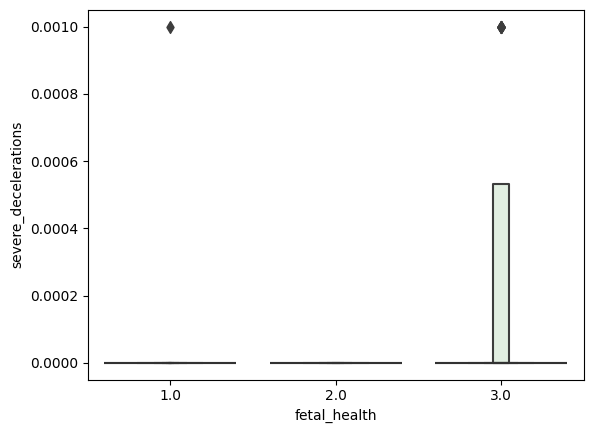

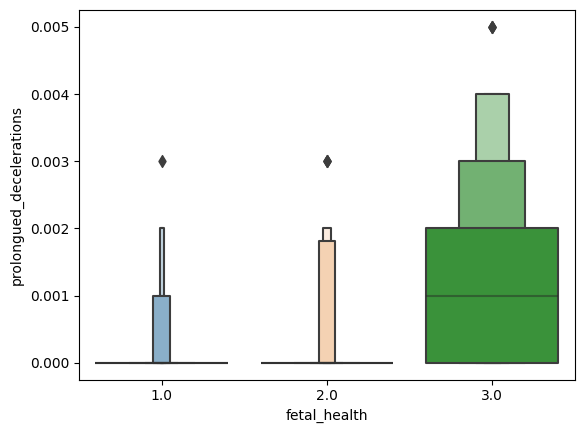

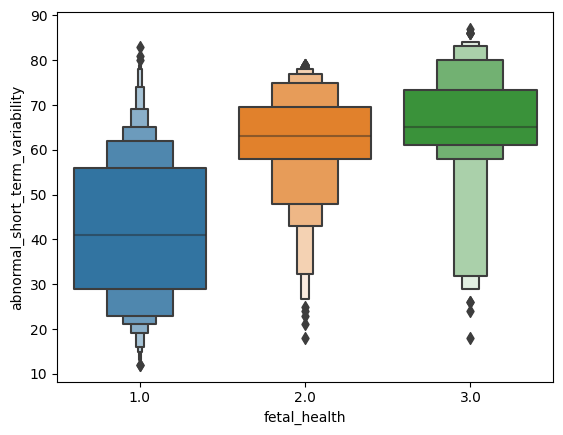

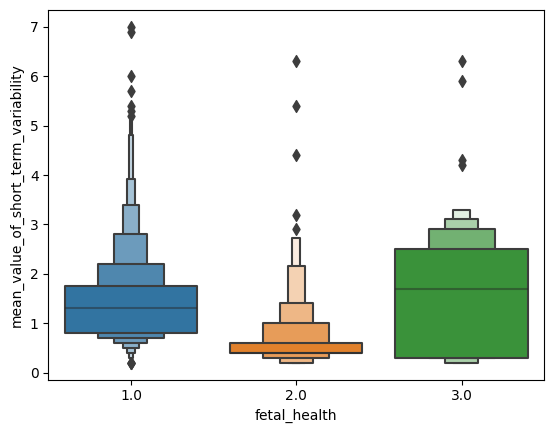

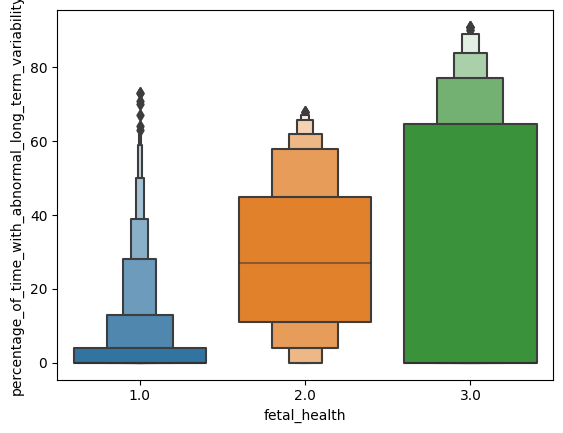

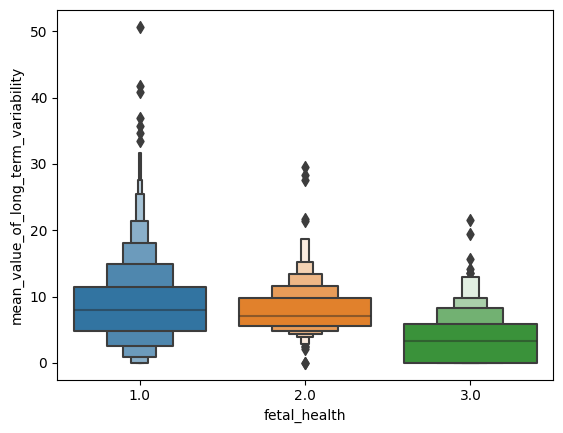

In [14]:
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']
for i in cols:
    sns.boxenplot(x=fetal_data["fetal_health"], y=fetal_data[i])
    plt.show()

The outliers on the dataset are spotted. However, it is not quite a reasonable idea to remove them as it may lead to overfitting. Though we may end up with better statistics.

The basic rule of thumb for the outliers in question is:

It is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In this case, this is the outcome of a CTG report so it is unlikely that this was a data entry error.

Thus assuming that these are the natural part of the population we are studying, we should not remove it.

**Use boxplot in order to show the range of the feature attributes**

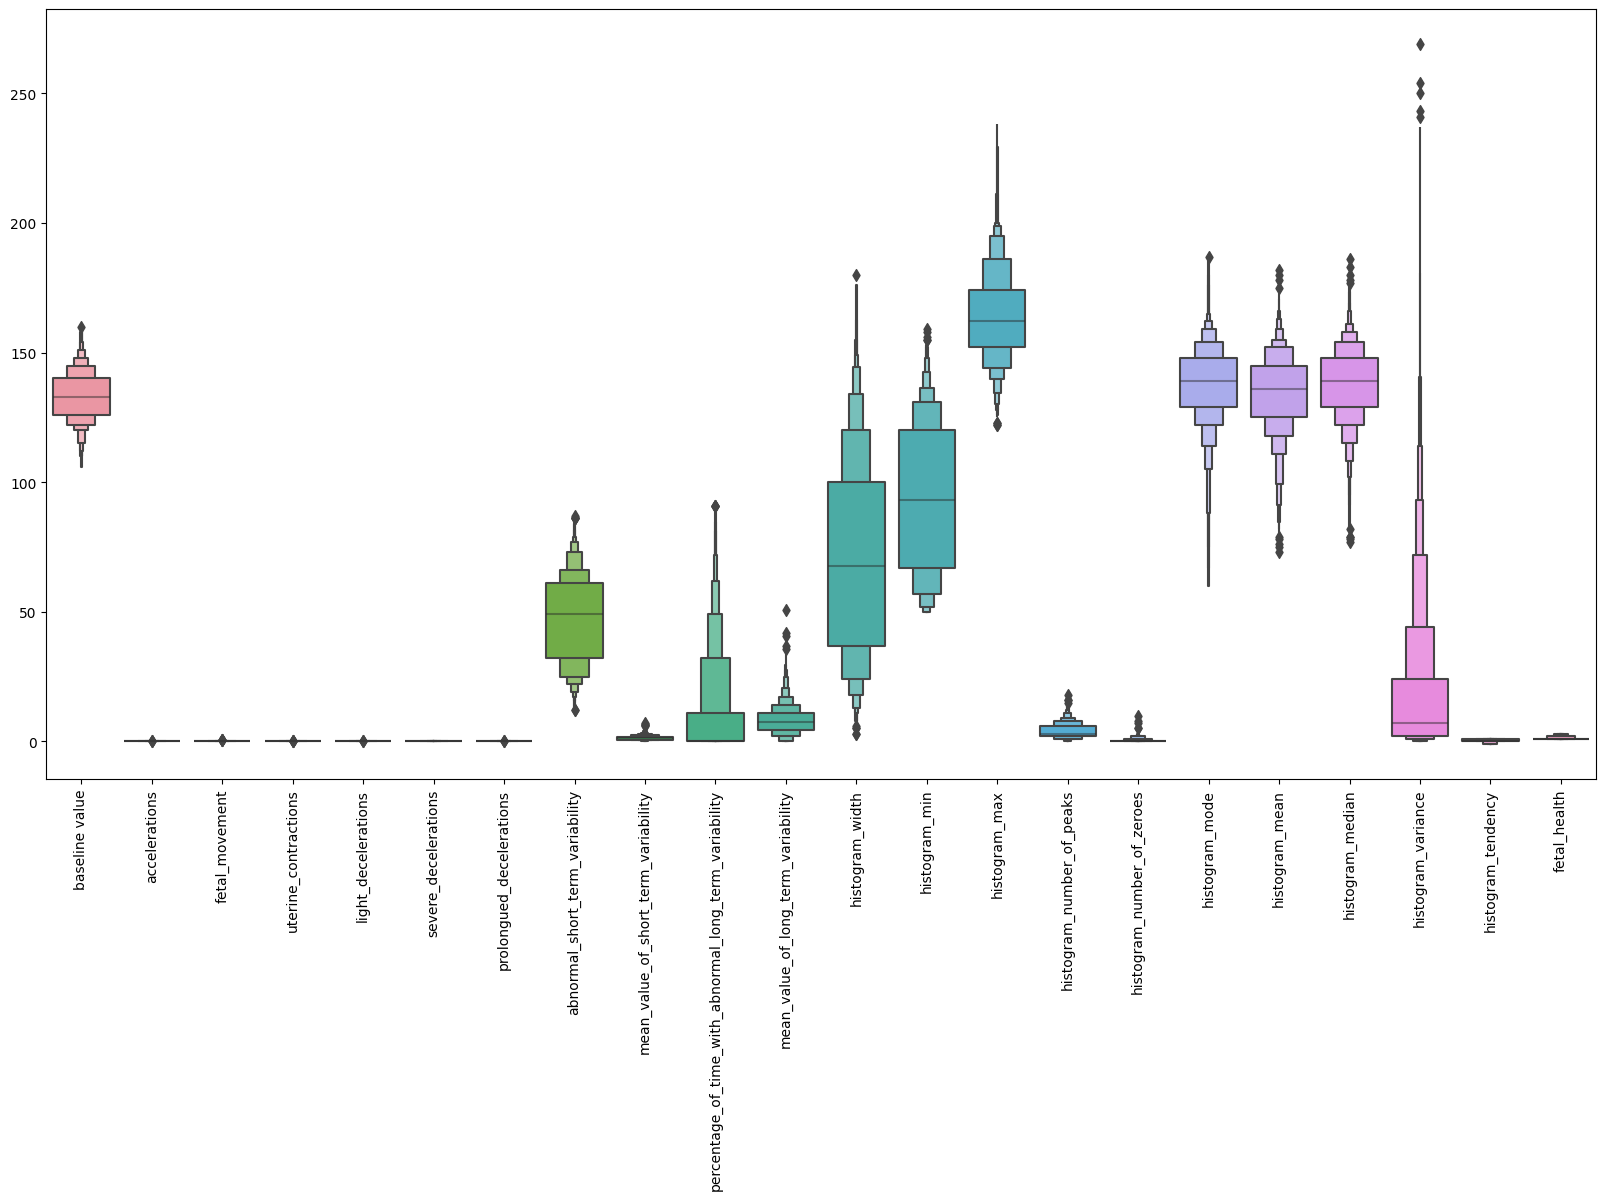

In [15]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = fetal_data)
plt.xticks(rotation=90)
plt.show()

Based on above boxplot, all the features are in different ranges. To fit this in a model we must scale it to
the same range. We do so in following steps.

**Feature analyzing using correlation**

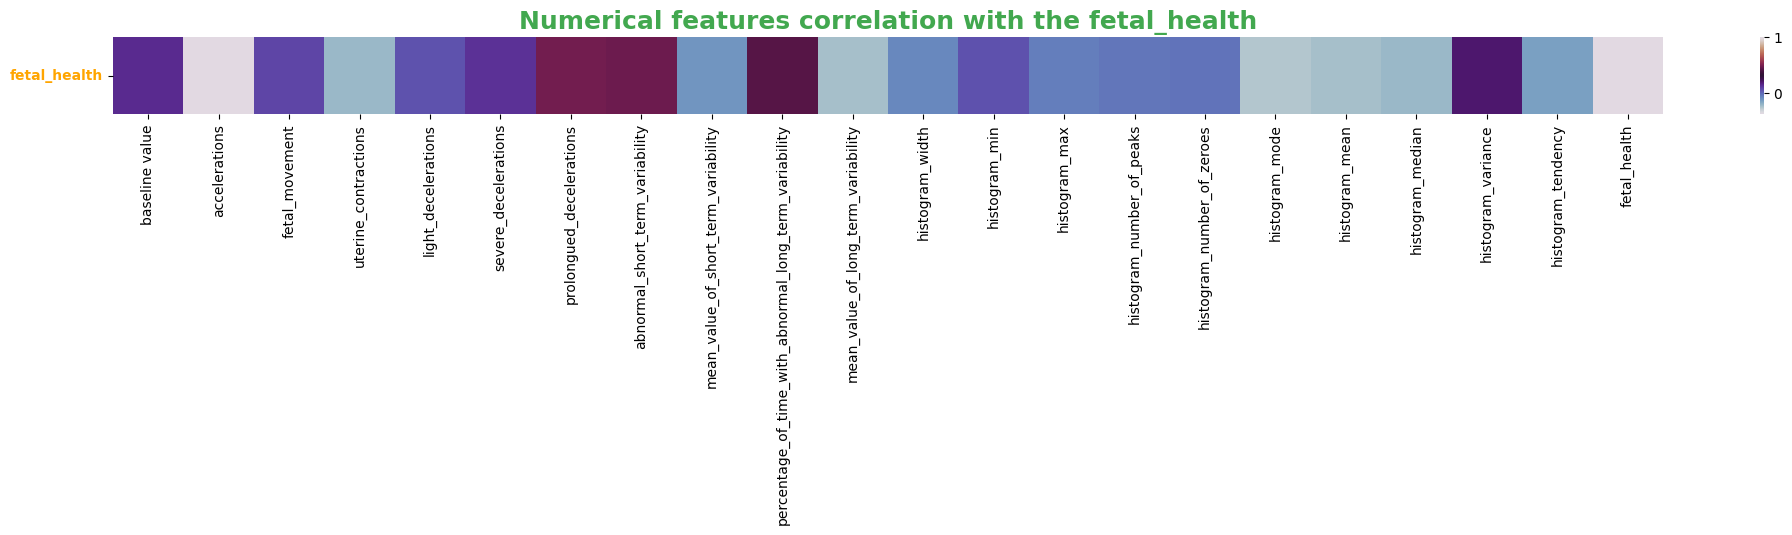

In [16]:
#Checking correlation of numeric features with output variable “Fetal health”
numeric_data = fetal_data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="twilight")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#42A84F")
plt.yticks(weight="bold", color="orange", rotation=0)

plt.show()

we find the features ”percentage of time with abnormal long term variability”,
”abnormal short term variability”, and ”prolongued decelerations” as key factors that may influence fetal
health positively, while ”accelerations” negatively.

**Feature analyzing using Correlation heatmap**

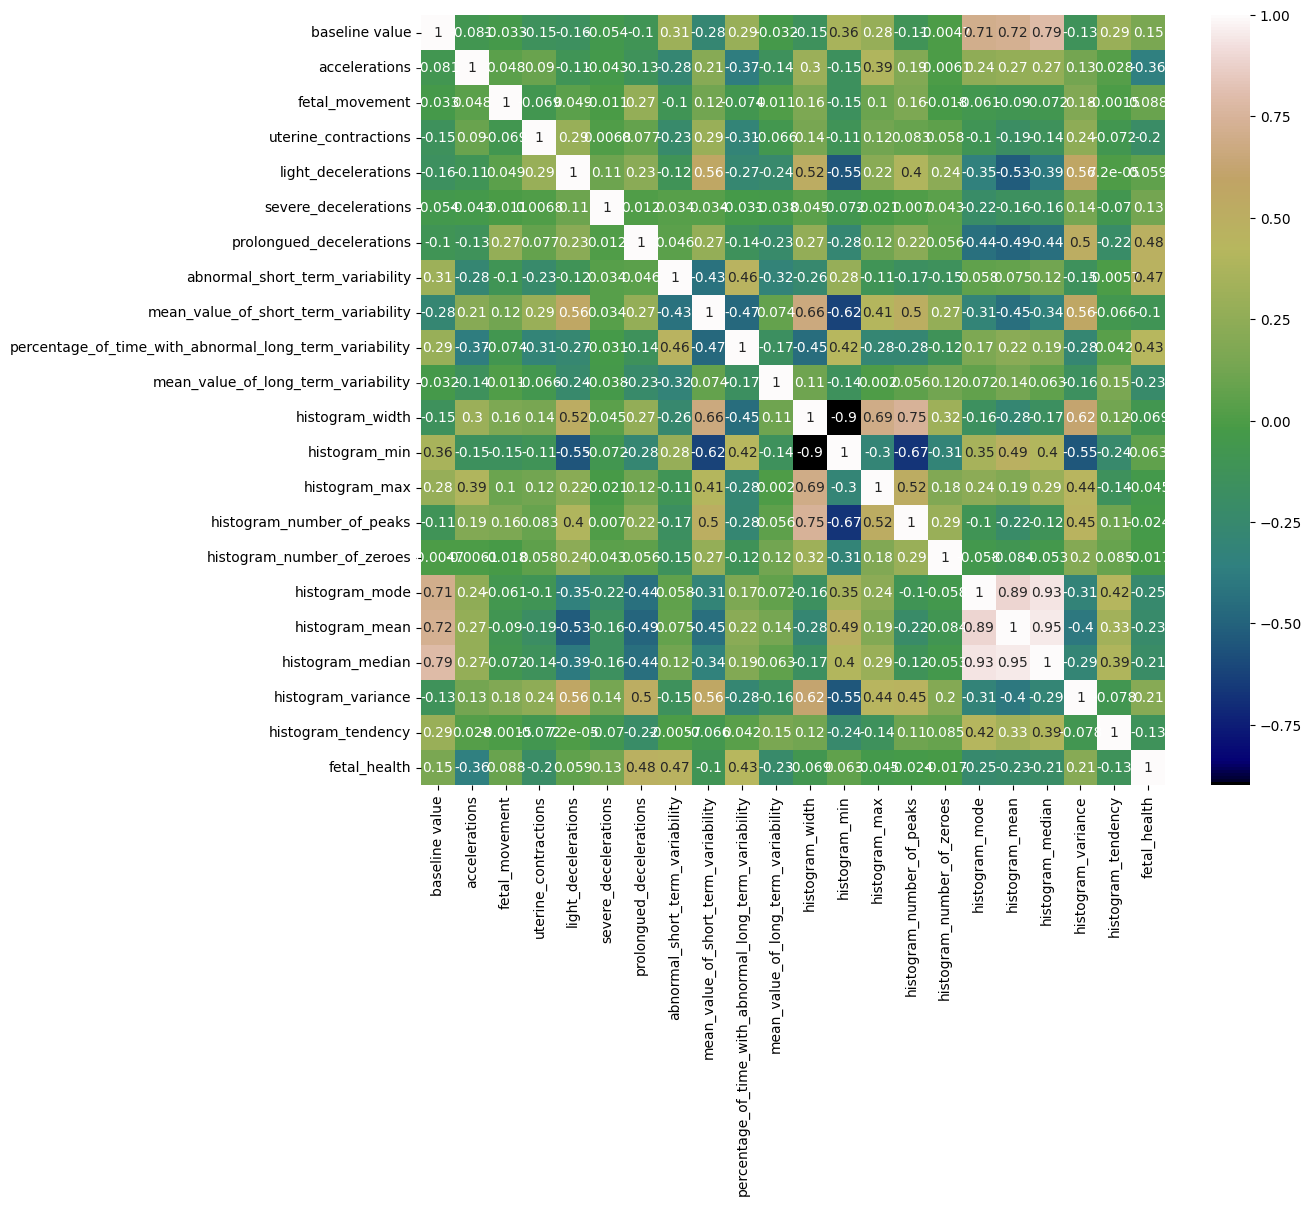

In [17]:
# Finding the Correlation using heat map
corr = fetal_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='gist_earth')
plt.show()

The heatmap shows ”histogram mean” and ”histogram median” have the strongest
correlation which is 0.95 and it means whenever one of them increases the other tends to increase too; and
the second strongest correlation is between ”histogram median” and ”histogram mode” with the coefficient
of 0.93. The most negative correlation with the coefficient of -0.9 is between ”histogram min” and ”histogram
width”, it means if one of them increases the other one decreases.

# Data Extraction and Engineering
* Separating features and target variable
* Data Scaling
* Principle Components analysis

In [18]:
#Separating features and target variable
fetal_data.keys()
y=fetal_data.fetal_health
x=fetal_data.drop(["fetal_health"],axis=1)

In [19]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(fetal_data)

StandardScaler()

Implement standardization in order to scale the data to have a mean of 0 and a standard deviation of 1

In [20]:
scaled_data=scaler.transform(fetal_data)
scaled_data

array([[-1.35222005, -0.8223883 , -0.20320955, ...,  1.87056871,
         1.11298001,  1.13258873],
       [-0.1325256 ,  0.73013282, -0.20320955, ..., -0.23499819,
        -0.52452553, -0.49545971],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.2004807 ,
        -0.52452553, -0.49545971],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ..., -0.51113811,
         1.11298001,  1.13258873],
       [ 0.68060404, -0.56363478, -0.20320955, ..., -0.51113811,
         1.11298001,  1.13258873],
       [ 0.88388645, -0.30488126, -0.16034157, ..., -0.61469058,
        -0.52452553, -0.49545971]])

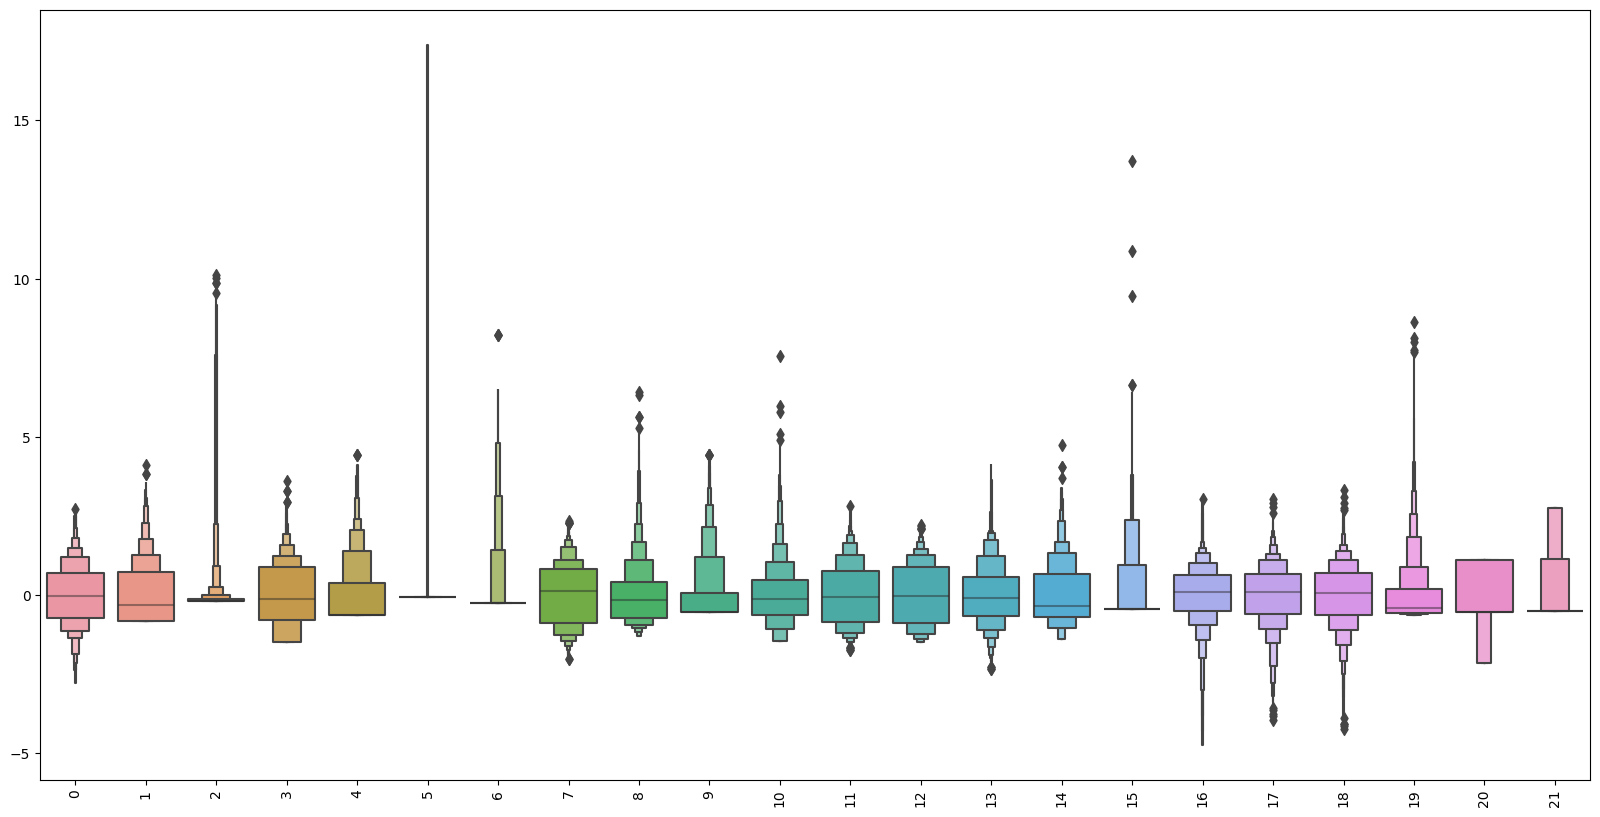

In [21]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = scaled_data)
plt.xticks(rotation=90)
plt.show()

**Principle Components analysis**

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
pca.fit(scaled_data)

PCA(n_components=14)

The dataset has been reduced into 14 components using principal component analysis.

In [23]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(2126, 22)

In [24]:
x_pca.shape

(2126, 14)

In [25]:
x_pca

array([[-0.23500502,  2.92935745,  1.18325108, ...,  1.1288257 ,
         1.21509629,  1.70940705],
       [ 1.9366776 , -2.41041186, -0.68376205, ...,  0.47696941,
        -0.34379969, -0.27110867],
       [ 1.95423383, -2.1735663 , -0.87394504, ...,  0.48383942,
        -0.18758241, -0.14764106],
       ...,
       [-2.09312038, -0.37453849,  1.81872779, ..., -0.05834635,
         0.10087283, -0.24326022],
       [-2.08648319, -0.29955705,  1.92667035, ...,  0.19170893,
        -0.10170511, -0.21004259],
       [-2.32018019,  0.51341244,  0.66692193, ..., -0.04292452,
         0.24024836,  0.2713143 ]])

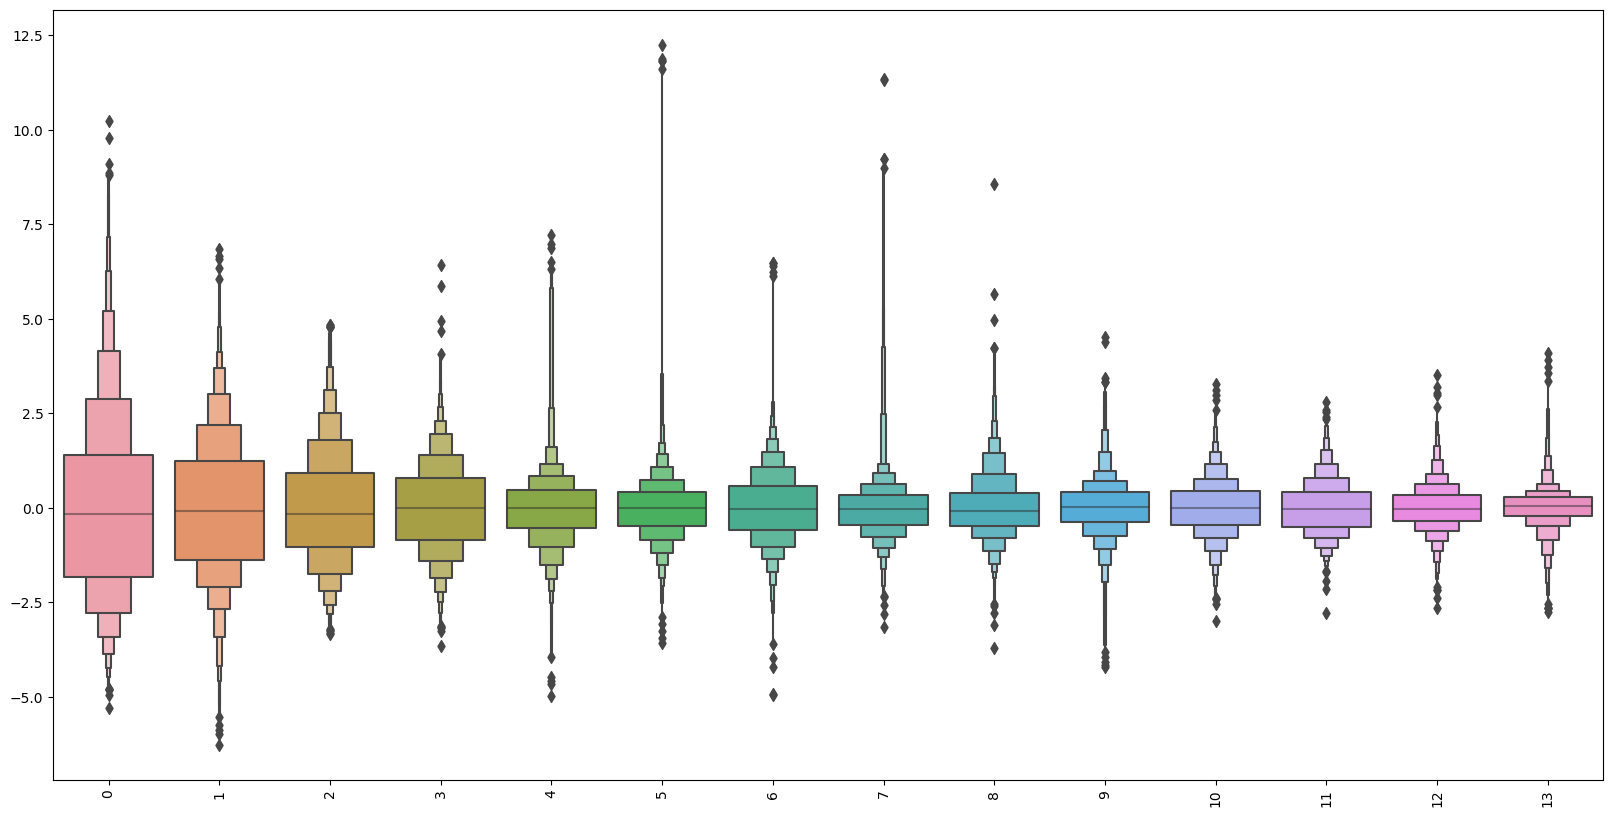

In [26]:
#looking at the features after PCA
plt.figure(figsize=(20,10))
sns.boxenplot(data = x_pca)
plt.xticks(rotation=90)
plt.show()

**Why we reduce dataset to 14 components?**

In [27]:
from sklearn.decomposition import PCA
cumsum = np.cumsum(pca.explained_variance_ratio_)
print (cumsum)
d=np.argmax(cumsum>=0.95)+1

[0.27542342 0.4418342  0.54630067 0.61476749 0.67077568 0.71745921
 0.76254182 0.80465881 0.83939648 0.86964948 0.89590367 0.9197636
 0.93776568 0.95339654]


In [28]:
d=np.argmax(cumsum>=0.95)+1
print (d)

14


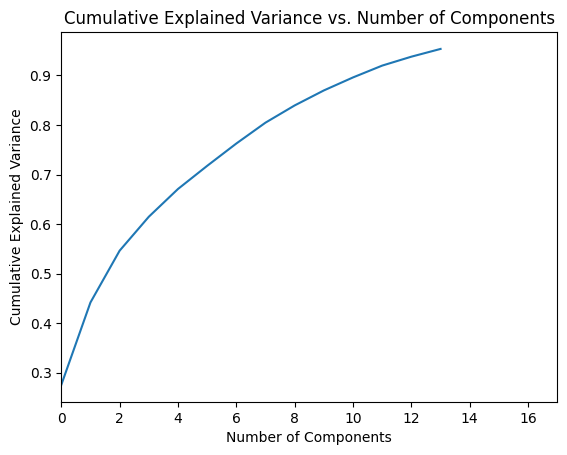

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set the x-axis limits
plt.xlim(0, 17)

# Optionally, set labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')

plt.show()

We realized that the number of dimension can be reduced from 22 to 14 while preserving 95% of its
variance. Hence the compressed dataset is of 60 percentage of its original size. Regarding to the below plot
of the explained variance as a function of the number of principal components , we observe an elbow in
the curve. The optimal number of principal components is reached when the cumulative variance stops
growing fast.

# Implementation of classification algorithms
In order to experiment different classifiers, we use RF, DT and KNN algorithms for predicting fetal health
and after that we evaluate the model’s performance providing the accuracy score and confusion matrix.
* Random Forest
* Decision Tree
* KNN

In [30]:
#Splitting data into 80% for training and 20% for testing
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

**RANDOM FOREST CLASSIFIER**

In [31]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test )

0.9812206572769953

In [32]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:98.122066


**Take a look at classification report**

In [33]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       333
         2.0       0.97      0.91      0.94        64
         3.0       1.00      1.00      1.00        29

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



**Take a look at confusion matrix**

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

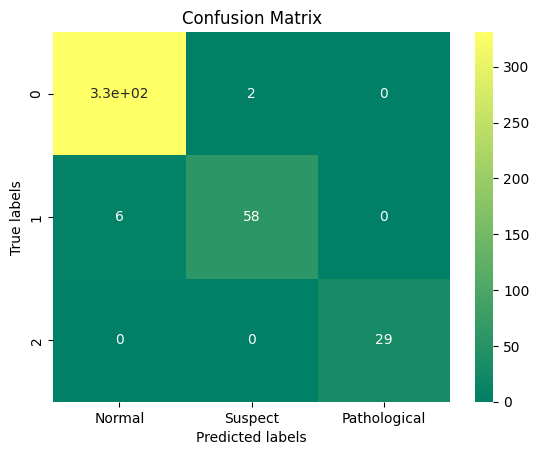

In [34]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "summer");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

**Analyze the RF model based on report and confusion matrix:**
* Precision: These high values shows that this model is good at avoiding false positives.
* Recall: These high values means this model successfully identifies most of the actual positive instances.
* F1-Score: These high F1-scores means performance is high across all classes.

The overall accuracy of the model is 0.99. The classification report indicates that the model performs well,
in particular for Class 1 and Class 3 because of very high precision, recall, and F1-scores. The performance
for Class 2 is a little lower but still strong so the model is working well in classifying fetal health outcomes
which can be seen in the confusion matrix.

**DECISION TREE CLASSIFIER**

In [35]:
#DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
model.fit(X_train_pca,y_train )
model.score(X_test_pca,y_test )

0.9436619718309859

In [36]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:94.366197


**Take a look at classification report**

In [37]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       333
         2.0       0.78      0.88      0.82        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.94       426
   macro avg       0.90      0.93      0.91       426
weighted avg       0.95      0.94      0.95       426



**Take a look at confusion matrix**

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

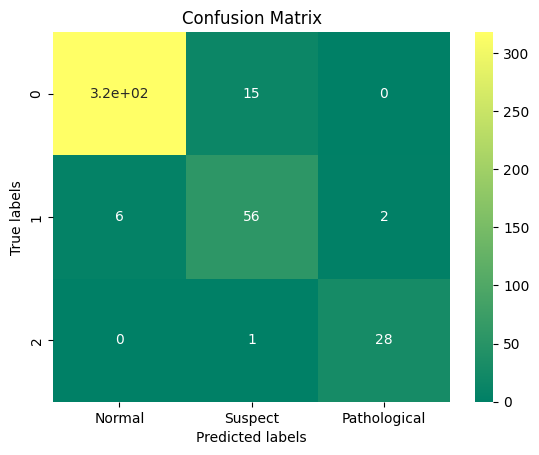

In [38]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "summer")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

**Analyze the RF based on report and confusion matrix:**
* Precision: This high value for Class 1 means this model is very accurate predicting this class. Class 2
has lower score which means it may produce more false positives.
* Recall: For Class 1 recall is high, shows most actual positives are correctly identified. Class 2 has a
little lower value, means some positive instances may be missed.
* F1-Score: This value suggests strong performance across the classes, with Class 2.0 which is the weakest.

**Overal:** The decision tree classifier works well in this data, especially for Class 1, with high precision, recall,
and F1 scores. Class 2 has needs some improvement because of lower precision and recall. The overall
accuracy indicates the model is effective for the dataset, but it is not balanced performance across all classes.

**KNN CLASSIFIER**

In [39]:
#kNN CLASSIFIER
model = KNeighborsClassifier()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test )

0.9624413145539906

In [40]:
pred = model.predict(X_test_pca)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,pred)*100))


accuracy score:96.244131


**Take a look at classification report**

In [41]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       333
         2.0       0.93      0.81      0.87        64
         3.0       0.96      0.90      0.93        29

    accuracy                           0.96       426
   macro avg       0.95      0.90      0.93       426
weighted avg       0.96      0.96      0.96       426



**Take a look at confusion matrix**

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

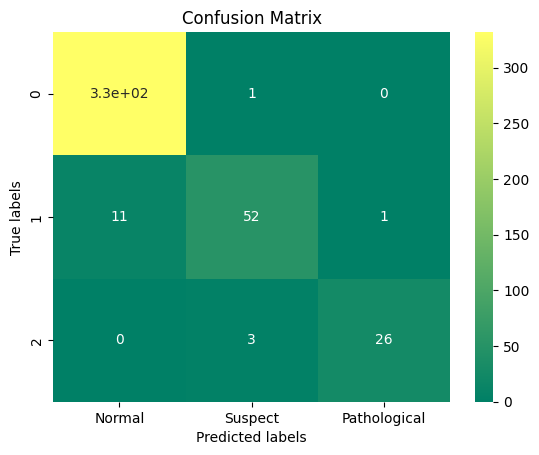

In [42]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "summer");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

**Analyze the RD based on report and confusion matrix:**
* Precision: This model depicts very high precision for all of the classes which means when it predicts
a class, it is probably correct.
* Recall: Class 1 shows a great recall and it means all actual instances in this class are identified
correctly. Class 2 shows lower score in recall which means some instances are not captured. For Class
3 some true instances are missed.
* F1-Score: This value for class 1 is strong due to its high precision and recall. Class 2 F1-score is
lower because of its recall decrease. Class 3 performs well, by high precision and good recall.

**Overall:** This model performs well, in particular for Class 1 with high precision, recall, and F1-score. Class
2 shows a need for improvement, especially in recall, meaning more tuning is needed to capture all relevant
instances.

**Comparing all the prediction models**

In [43]:
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   RF  0.983568
1  KNN  0.962441
2   DT  0.931925


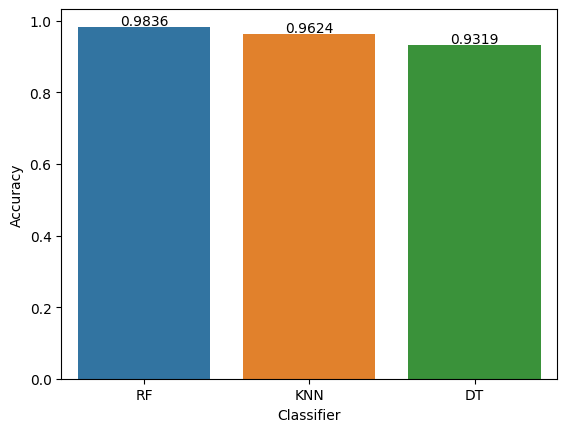

In [44]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The above comparison shows the accuracy scores of classification algorithms. Clearly it can be concluded that **Random Forest** is an optimal model of choice of the given dataset as it has relatively the highest combination of accuracy followed by **K-Nearest Neighbors** and **Decision tree**. 